In [702]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


## 📖 Guía de Traducción Semántica: Del Lenguaje Natural a Notación Matemática

Cuando trabajamos con problemas de probabilidad, es fundamental **interpretar correctamente** el enunciado y traducirlo a notación matemática. Aquí hay una guía de las expresiones más comunes:

### Expresiones de Cantidad

| Expresión en español | Notación matemática | Ejemplo |
|---------------------|---------------------|---------|
| **Ninguna** / Ninguno | X = 0 | "Ninguna infracción" → P(X = 0) |
| **Alguna** / Alguno | X ≥ 1 | "Alguna infracción" → P(X ≥ 1) |
| **Al menos k** / Por lo menos k | X ≥ k | "Al menos 2" → P(X ≥ 2) |
| **Exactamente k** | X = k | "Exactamente 3" → P(X = 3) |
| **A lo sumo k** / Como máximo k | X ≤ k | "A lo sumo 3" → P(X ≤ 3) |
| **Más de k** | X > k o X ≥ k+1 | "Más de 2" → P(X > 2) = P(X ≥ 3) |
| **Menos de k** | X < k o X ≤ k-1 | "Menos de 3" → P(X < 3) = P(X ≤ 2) |
| **Entre a y b** (inclusivo) | a ≤ X ≤ b | "Entre 2 y 5" → P(2 ≤ X ≤ 5) |
| **Todas** / Todos | X = n | "Todas las 5 infracciones" → P(X = 5) |

### Estrategia del Complemento

Cuando vemos **"alguna"** o **"al menos una"**, es más eficiente usar el complemento:

- **P(X ≥ 1) = 1 - P(X = 0)**

Esto evita sumar múltiples probabilidades: P(X=1) + P(X=2) + P(X=3) + ...

### Consejos Prácticos

1. **Identifica la variable aleatoria**: ¿Qué estamos contando? (infracciones, éxitos, defectos, etc.)
2. **Traduce la expresión**: Usa la tabla anterior como referencia
3. **Verifica límites**: ¿Incluye o excluye el valor límite? ("hasta 3" vs "menos de 3")
4. **Considera el complemento**: Si el cálculo directo es largo, usa 1 - P(complemento)

# Ejercicio 1
La tabla siguiente corresponde a la función de probabilidad de una variable aleatoria discreta $X$:

$$
\begin{array}{|c|c|c|c|c|c|}
\hline
\text{Valores } x_i \text{ de } X & 1 & 2 & 3 & 4 & 5 \\
\hline
p(x_i) & 0{,}1 & 0{,}1 & 0{,}3 & 0{,}3 & 0{,}2 \\
\hline
\end{array}
$$

**a) Hallar:**

a.1) $p(X \geq 2)$  
a.2) $p(1 \leq X \leq 3)$  
a.3) $p(1 < X \leq 3)$  
a.4) $p(X \leq 1)$  
a.5) $p(X > 2)$  
a.6) $p(X \leq 3)$

**b) Hallar y graficar la función de distribución de $X$.**

In [703]:
# Construimos la tabla de distribución de probabilidad

tabla1 = pd.DataFrame({
    'X': [1, 2, 3, 4, 5],
    'p': [0.1, 0.1, 0.3, 0.3, 0.2]
})

tabla1

,X,p
0,1,0.1
1,2,0.1
2,3,0.3
3,4,0.3
4,5,0.2


In [704]:
# a.1 Calculamos p(X ≥ 2) sumando las probabilidades donde X ≥ 2
p_X_mayor_igual_2 = tabla1.loc[tabla1['X'] >= 2, 'p'].sum()
print(f"p(X ≥ 2) = {p_X_mayor_igual_2:.1f}")

# a.1 Calculamos p(X ≥ 2) usando numpy. Calculamos 1 - p(X < 2)
p_X_mayor_igual_2_numpy = 1 - np.sum(tabla1.loc[(tabla1['X'] < 2), 'p'])
print(f"p(X ≥ 2) usando numpy = {p_X_mayor_igual_2_numpy:.1f}")

p(X ≥ 2) = 0.9
p(X ≥ 2) usando numpy = 0.9


In [705]:
# a.2 Calculamos p(1 ≤ X ≤ 3) sumando las probabilidades donde 1 ≤ X ≤ 3
p_1_menor_igual_X_menor_igual_3 = tabla1.loc[(tabla1['X'] >= 1) & (tabla1['X'] <= 3), 'p'].sum()
print(f"p(1 ≤ X ≤ 3) = {p_1_menor_igual_X_menor_igual_3:.1f}")

# a.3 Calculamos p(1 ≤ X ≤ 3) usando numpy. Calculamos p(X ≤ 3) - p(X < 1)
p_1_menor_igual_X_menor_igual_3_np = np.sum(tabla1.loc[(tabla1['X'] <= 3), 'p']) - np.sum(tabla1.loc[(tabla1['X'] < 1), 'p'])
print(f"p(1 ≤ X ≤ 3) usando numpy = {p_1_menor_igual_X_menor_igual_3_np:.1f}")

p(1 ≤ X ≤ 3) = 0.5
p(1 ≤ X ≤ 3) usando numpy = 0.5


In [706]:
# a.3 Calculamos p(2 ≤ X < 4) sumando las probabilidades donde 2 ≤ X < 4
p_2_menor_igual_X_menor_4 = tabla1.loc[(tabla1['X'] >= 2) & (tabla1['X'] < 4), 'p'].sum()
print(f"p(2 ≤ X < 4) = {p_2_menor_igual_X_menor_4:.1f}")

# a.3 Calculamos p(2 ≤ X < 4) usando numpy. Calculamos p(X < 4) - p(X < 2)
p_2_menor_igual_X_menor_4_np = np.sum(tabla1.loc[(tabla1['X'] < 4), 'p']) - np.sum(tabla1.loc[(tabla1['X'] < 2), 'p'])
print(f"p(2 ≤ X < 4) usando numpy = {p_2_menor_igual_X_menor_4_np:.1f}")

p(2 ≤ X < 4) = 0.4
p(2 ≤ X < 4) usando numpy = 0.4


In [707]:
# a.4 Calculamos p(X ≤ 1) sumando las probabilidades donde X ≤ 1
p_X_menor_igual_1 = tabla1.loc[(tabla1['X'] <= 1), 'p'].sum()
print(f"p(X ≤ 1) = {p_X_menor_igual_1:.1f}")

# a.4 Calculamos p(X ≤ 1) usando numpy
p_X_menor_igual_1_numpy = np.sum(tabla1.loc[(tabla1['X'] <= 1), 'p'])
print(f"p(X ≤ 1) usando numpy = {p_X_menor_igual_1_numpy}")

p(X ≤ 1) = 0.1
p(X ≤ 1) usando numpy = 0.1


In [708]:
# a.5 Calculamos p(X > 2) sumando las probabilidades donde X > 2
p_X_mayor_2 = tabla1.loc[(tabla1['X'] > 2), 'p'].sum()
print(f"p(X > 2) = {p_X_mayor_2}")

# a.5 Calculamos p(X > 2) usando numpy. Calculamos 1 - p(X ≤  2)
p_X_mayor_2_numpy = 1 - np.sum(tabla1.loc[(tabla1['X'] <= 2), 'p'])
print(f"p(X > 2) usando numpy = {p_X_mayor_2_numpy}")

p(X > 2) = 0.8
p(X > 2) usando numpy = 0.8


In [709]:
# a.6 Calculamos p(X ≤ 3) sumando las probabilidades donde X ≤ 3
p_X_menor_igual_3 = tabla1.loc[(tabla1['X'] <= 3), 'p'].sum()
print(f"p(X ≤ 3) = {p_X_menor_igual_3:.1f}")

# a.6 Calculamos p(X ≤ 3) usando numpy
p_X_menor_igual_3_numpy = np.sum(tabla1.loc[tabla1['X'] <= 3, 'p'])
print(f"p(X ≤ 3) usando numpy = {p_X_menor_igual_3_numpy:.1f}")

p(X ≤ 3) = 0.5
p(X ≤ 3) usando numpy = 0.5


In [710]:
# b Hallar y graficar la función de distribución acumulada F(x) = P(X ≤ x)
# Calculamos la función de distribución acumulada F(x)
tabla1['F(x)'] = tabla1['p'].cumsum()
tabla1

,X,p,F(x)
0,1,0.1,0.1
1,2,0.1,0.2
2,3,0.3,0.5
3,4,0.3,0.8
4,5,0.2,1.0


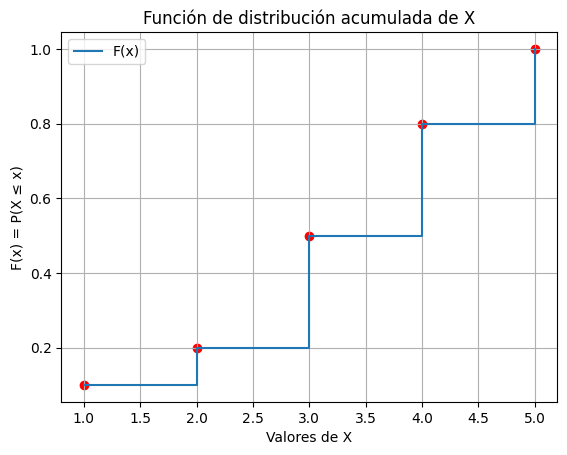

In [711]:
# Graficamos la función de distribución acumulada F(x)
plt.step(tabla1['X'], tabla1['F(x)'], where='post', label='F(x)')
plt.scatter(tabla1['X'], tabla1['F(x)'], color='red')
plt.xlabel('Valores de X')
plt.ylabel('F(x) = P(X ≤ x)')
plt.title('Función de distribución acumulada de X')
plt.grid(True)
plt.legend()
plt.show()

# Ejercicio 2
La siguiente variable aleatoria discreta $X$ está definida por la siguiente función de probabilidad:

$$
\begin{array}{|c|c|c|c|c|}
\hline
\text{Valores } x_i \text{ de } X & -1 & 0 & 1 & 2 \\
\hline
p(x_i) & \dfrac{1}{5} & \dfrac{1}{3} & \dfrac{2}{5} & \dfrac{1}{15} \\
\hline
\end{array}
$$

**a)** ¿Cuál es la probabilidad que $X$ tome el valor $2$?

**b)** Hallar la función de distribución $F(x)$. Calcular $F(-3)$, $F(0{,}5)$, $F(1)$ y $F(5)$.

**c)** Graficar la función de distribución.

In [712]:
# Construimos la tabla de distribución de probabilidad
# Dejamos el valor de p(X=2) como None temporalmente

tabla2 = pd.DataFrame({
    'X': [-1, 0, 1, 2],
    'p': [1/5, 1/3, 2/5, None]
})

round(tabla2, 2)

,X,p
0,-1,0.20
1,0,0.33
2,1,0.40
3,2,NaN


In [713]:
# a p(X = 2) = 1 - (1/5 + 1/3 + 2/5) = a
a = 1 - (1/5 + 1/3 + 2/5)
print(f"p(X = 2) = {a:.4f}")

p(X = 2) = 0.0667


In [714]:
# b Calcular la función de distribución acumulada F(x)
print(f"p(X = 2) = {a:.4f}")

# Reemplazamos el valor None con el valor calculado de 'a'
tabla2.loc[tabla2['X'] == 2, 'p'] = a

# Calculamos F(x)
tabla2['F(x)'] = round(tabla2['p'].cumsum(), 2)
tabla2

p(X = 2) = 0.0667


,X,p,F(x)
0,-1,0.200000,0.20
1,0,0.333333,0.53
2,1,0.400000,0.93
3,2,0.066667,1.00


In [715]:
# b Definir la función de distribución acumulada F(x) para cualquier valor real x
def funcion_acumulada(x):
    if x < -1:
        return 0
    elif -1 <= x < 0:
        return 1/5
    elif 0 <= x < 1:
        return 1/5 + 1/3
    elif 1 <= x < 2:
        return 1/5 + 1/3 + 2/5
    else:  # x >= 2
        return 1
    
# Hallar valores
print(f"F(-3) = {funcion_acumulada(-3):.2f}")
print(f"F(0.5) = {funcion_acumulada(0.5):.2f}")
print(f"F(1) = {funcion_acumulada(1):.2f}")
print(f"F(5) = {funcion_acumulada(5):.2f}")

F(-3) = 0.00
F(0.5) = 0.53
F(1) = 0.93
F(5) = 1.00


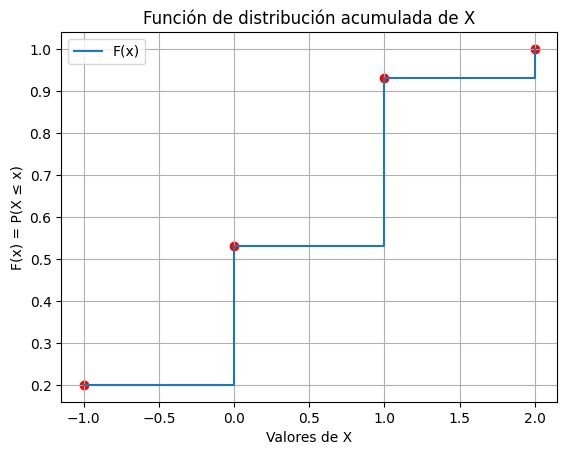

In [716]:
# c Graficamos la función de distribución acumulada F(x)
plt.step(tabla2['X'], tabla2['F(x)'], where='post', label='F(x)')
plt.scatter(tabla2['X'], tabla2['F(x)'], color='red')
plt.xlabel('Valores de X')
plt.ylabel('F(x) = P(X ≤ x)')
plt.title('Función de distribución acumulada de X')
plt.grid(True)
plt.legend()
plt.show()

# Ejercicio 3
Una firma de inversores ofrece a sus clientes bonos municipales que vencen después de diferente número de años. La función de distribución de $T$ = número de años para el vencimiento de un bono seleccionado aleatoriamente está dada por:

$$\
F(t) = 
\begin{cases}
0 & \text{si } t < 1 \\
\frac{1}{4} & \text{si } 1 \leq t < 3 \\
\frac{1}{2} & \text{si } 3 \leq t < 5 \\
\frac{3}{4} & \text{si } 5 \leq t < 7 \\
1 & \text{si } 7 \leq t \\
\end{cases}
$$\

Calcular:

a) $P(T = 5)$

b) $P(T > 3)$

c) $P(1{,}4 \leq T < 6)$

d) $P(2 \leq T < 5 \mid T > 1{,}2)$

In [717]:
# Construimos tabla de distribución de probabilidad

tabla3 = pd.DataFrame({
    'T': [1, 3, 5, 7],
    'p': [1/4, (1/2) - (1/4), (3/4) - (1/2), 1 - (3/4)]
})

# Agregamos F(x)
tabla3['F(t)'] = tabla3['p'].cumsum()

round(tabla3, 2)

,T,p,F(t)
0,1,0.25,0.25
1,3,0.25,0.50
2,5,0.25,0.75
3,7,0.25,1.00


In [718]:
# Construímos función de distribución F(t)
def funcion_acumulada_3(t):
    if t < 1:
        return 0
    elif 1 <= t < 3:
        return 1/4
    elif 3 <= t < 5:
        return 2*1/4
    elif 5 <= t < 7:
        return 3*1/4
    else:  # t >= 7
        return 1


In [719]:
# a) Calculamos la probabilidad de que T = 5 usando la función de distribución acumulada
p_T_igual_5 = funcion_acumulada_3(5) - funcion_acumulada_3(3)
print(f"P(T = 5) = {p_T_igual_5:.4f}")

P(T = 5) = 0.2500


In [720]:
# b) Calculamos la probabilidad de que T > 3 usando la función de distribución acumulada
p_T_mayor_3 = 1 - funcion_acumulada_3(3)
print(f"P(T > 3) = {p_T_mayor_3:.4f}")

P(T > 3) = 0.5000


In [721]:
# c) Calculamos P(1,4 ≤ T < 6) usando la función de distribución acumulada
# P(1,4 ≤ T < 6) = F(6) - F(1,4)

p_T_entre_1_4_y_6 = funcion_acumulada_3(6) - funcion_acumulada_3(1.4)
print(f"P(1,4 ≤ T < 6) = {p_T_entre_1_4_y_6:.4f}")

P(1,4 ≤ T < 6) = 0.5000


In [722]:
# d) Calculamos P(2 ≤ T < 5 | T > 1,2) usando probabilidad condicional
# P(A|B) = P(A ∩ B) / P(B)
# donde A = {2 ≤ T < 5} y B = {T > 1,2}
# A ∩ B = {2 ≤ T < 5} (ya que 2 > 1,2)

# P(2 ≤ T < 5): Como T es discreta y solo toma valores 1, 3, 5, 7
# Los valores entre 2 y 5 (sin incluir 5) son: T = 3
# Por lo tanto: P(2 ≤ T < 5) = P(T = 3) = F(3) - F(1)
p_2_menor_igual_T_menor_5 = funcion_acumulada_3(3) - funcion_acumulada_3(1)
print(f"P(2 ≤ T < 5) = P(T = 3) = {p_2_menor_igual_T_menor_5:.4f}")

# P(T > 1,2): Como 1,2 está entre 1 y 3, usamos F(1,2) = F(1) = 1/4
# P(T > 1,2) = 1 - F(1,2) = 1 - 1/4 = 3/4
p_T_mayor_1_2 = 1 - funcion_acumulada_3(1.2)
print(f"P(T > 1,2) = {p_T_mayor_1_2:.4f}")

# P(2 ≤ T < 5 | T > 1,2) = P(2 ≤ T < 5) / P(T > 1,2)
p_condicional = p_2_menor_igual_T_menor_5 / p_T_mayor_1_2
print(f"\nP(2 ≤ T < 5 | T > 1,2) = {p_condicional:.4f}")

P(2 ≤ T < 5) = P(T = 3) = 0.2500
P(T > 1,2) = 0.7500

P(2 ≤ T < 5 | T > 1,2) = 0.3333


# Ejercicio 4
Calcular E(X) y V (X) para las variables aleatorias de los ejercicios 1 y 2.

### a) Variable del Ejercicio 1

In [723]:
# Ejercicio 4a: Calcular E(X) y V(X) para la variable del Ejercicio 1

# Hacemos una copia de tabla1 para no modificar la original
tabla1_ej4 = tabla1[['X', 'p']].copy()

print("="*60)
print("EJERCICIO 4a: Cálculo de E(X) y V(X) - Variable Ejercicio 1")
print("="*60)

# Paso 1: Calcular E(X) = Σ[x_i · p(x_i)]
tabla1_ej4['x·p'] = tabla1_ej4['X'] * tabla1_ej4['p']
E_X = tabla1_ej4['x·p'].sum()

print("\n📊 Paso 1: Cálculo de E(X)")
print(f"E(X) = Σ[x_i · p(x_i)] = {E_X:.2f}")
print("\nTabla con columna x·p:")
print(tabla1_ej4)

# Paso 2: Calcular E(X²) = Σ[x_i² · p(x_i)]
tabla1_ej4['x²·p'] = (tabla1_ej4['X']**2) * tabla1_ej4['p']
E_X_cuadrado = tabla1_ej4['x²·p'].sum()

print("\n📊 Paso 2: Cálculo de E(X²)")
print(f"E(X²) = Σ[x_i² · p(x_i)] = {E_X_cuadrado:.2f}")

# Paso 3: Calcular V(X) = E(X²) - [E(X)]²
V_X = E_X_cuadrado - E_X**2

print("\n📊 Paso 3: Cálculo de V(X)")
print("V(X) = E(X²) - [E(X)]²")
print(f"V(X) = {E_X_cuadrado:.2f} - ({E_X:.2f})²")
print(f"V(X) = {E_X_cuadrado:.2f} - {E_X**2:.2f}")
print(f"V(X) = {V_X:.4f}")

# Paso 4: Calcular desviación estándar σ(X) = √V(X)
sigma_X = np.sqrt(V_X)
print("\n📊 Paso 4: Cálculo de σ(X)")
print(f"σ(X) = √V(X) = √{V_X:.4f} = {sigma_X:.4f}")

# Método alternativo: V(X) = Σ[(x_i - E(X))² · p(x_i)]
tabla1_ej4['(x-E)²·p'] = ((tabla1_ej4['X'] - E_X)**2) * tabla1_ej4['p']
V_X_alternativo = tabla1_ej4['(x-E)²·p'].sum()

print("\n🔍 Verificación con método alternativo:")
print(f"V(X) = Σ[(x_i - E(X))² · p(x_i)] = {V_X_alternativo:.4f}")

# Mostrar tabla completa con todos los cálculos
print("\n📋 Tabla completa con todos los cálculos:")
print(tabla1_ej4.to_string(index=False))

# Verificación con NumPy
print("\n✅ Verificación con NumPy:")
E_X_numpy = np.average(tabla1['X'], weights=tabla1['p'])
V_X_numpy = np.average((tabla1['X'] - E_X_numpy)**2, weights=tabla1['p'])
sigma_X_numpy = np.sqrt(V_X_numpy)

print(f"E(X) = {E_X_numpy:.2f}")
print(f"V(X) = {V_X_numpy:.4f}")
print(f"σ(X) = {sigma_X_numpy:.4f}")

print(f"\n{'='*60}")
print("RESULTADOS FINALES - Ejercicio 1:")
print(f"{'='*60}")
print(f"Valor Esperado:      E(X) = {E_X:.2f}")
print(f"Varianza:            V(X) = {V_X:.4f}")
print(f"Desviación Estándar: σ(X) = {sigma_X:.4f}")
print(f"{'='*60}\n")

EJERCICIO 4a: Cálculo de E(X) y V(X) - Variable Ejercicio 1

📊 Paso 1: Cálculo de E(X)
E(X) = Σ[x_i · p(x_i)] = 3.40

Tabla con columna x·p:
   X    p  x·p
0  1  0.1  0.1
1  2  0.1  0.2
2  3  0.3  0.9
3  4  0.3  1.2
4  5  0.2  1.0

📊 Paso 2: Cálculo de E(X²)
E(X²) = Σ[x_i² · p(x_i)] = 13.00

📊 Paso 3: Cálculo de V(X)
V(X) = E(X²) - [E(X)]²
V(X) = 13.00 - (3.40)²
V(X) = 13.00 - 11.56
V(X) = 1.4400

📊 Paso 4: Cálculo de σ(X)
σ(X) = √V(X) = √1.4400 = 1.2000

🔍 Verificación con método alternativo:
V(X) = Σ[(x_i - E(X))² · p(x_i)] = 1.4400

📋 Tabla completa con todos los cálculos:
 X   p  x·p  x²·p  (x-E)²·p
 1 0.1  0.1   0.1     0.576
 2 0.1  0.2   0.4     0.196
 3 0.3  0.9   2.7     0.048
 4 0.3  1.2   4.8     0.108
 5 0.2  1.0   5.0     0.512

✅ Verificación con NumPy:
E(X) = 3.40
V(X) = 1.4400
σ(X) = 1.2000

RESULTADOS FINALES - Ejercicio 1:
Valor Esperado:      E(X) = 3.40
Varianza:            V(X) = 1.4400
Desviación Estándar: σ(X) = 1.2000


📊 Paso 2: Cálculo de E(X²)
E(X²) = Σ[x_i² 

### b) Variable del Ejercicio 2

In [724]:
# Ejercicio 4b: Calcular E(X) y V(X) para la variable del Ejercicio 2

# Hacemos una copia de tabla2 para no modificar la original
tabla2_ej4 = tabla2[['X', 'p']].copy()

print("="*60)
print("EJERCICIO 4b: Cálculo de E(X) y V(X) - Variable Ejercicio 2")
print("="*60)

# Paso 1: Calcular E(X) = Σ[x_i · p(x_i)]
tabla2_ej4['x·p'] = tabla2_ej4['X'] * tabla2_ej4['p']
E_X2 = tabla2_ej4['x·p'].sum()

print("\n📊 Paso 1: Cálculo de E(X)")
print(f"E(X) = Σ[x_i · p(x_i)] = {E_X2:.4f}")
print("\nTabla con columna x·p:")
print(tabla2_ej4)

# Paso 2: Calcular E(X²) = Σ[x_i² · p(x_i)]
tabla2_ej4['x²·p'] = (tabla2_ej4['X']**2) * tabla2_ej4['p']
E_X2_cuadrado = tabla2_ej4['x²·p'].sum()

print("\n📊 Paso 2: Cálculo de E(X²)")
print(f"E(X²) = Σ[x_i² · p(x_i)] = {E_X2_cuadrado:.4f}")

# Paso 3: Calcular V(X) = E(X²) - [E(X)]²
V_X2 = E_X2_cuadrado - E_X2**2

print("\n📊 Paso 3: Cálculo de V(X)")
print("V(X) = E(X²) - [E(X)]²")
print(f"V(X) = {E_X2_cuadrado:.4f} - ({E_X2:.4f})²")
print(f"V(X) = {E_X2_cuadrado:.4f} - {E_X2**2:.4f}")
print(f"V(X) = {V_X2:.4f}")

# Paso 4: Calcular desviación estándar σ(X) = √V(X)
sigma_X2 = np.sqrt(V_X2)
print("\n📊 Paso 4: Cálculo de σ(X)")
print(f"σ(X) = √V(X) = √{V_X2:.4f} = {sigma_X2:.4f}")

# Método alternativo: V(X) = Σ[(x_i - E(X))² · p(x_i)]
tabla2_ej4['(x-E)²·p'] = ((tabla2_ej4['X'] - E_X2)**2) * tabla2_ej4['p']
V_X2_alternativo = tabla2_ej4['(x-E)²·p'].sum()

print("\n🔍 Verificación con método alternativo:")
print(f"V(X) = Σ[(x_i - E(X))² · p(x_i)] = {V_X2_alternativo:.4f}")

# Mostrar tabla completa con todos los cálculos
print("\n📋 Tabla completa con todos los cálculos:")
print(tabla2_ej4.to_string(index=False))

# Verificación con NumPy
print("\n✅ Verificación con NumPy:")
E_X2_numpy = np.average(tabla2['X'], weights=tabla2['p'])
V_X2_numpy = np.average((tabla2['X'] - E_X2_numpy)**2, weights=tabla2['p'])
sigma_X2_numpy = np.sqrt(V_X2_numpy)

print(f"E(X) = {E_X2_numpy:.4f}")
print(f"V(X) = {V_X2_numpy:.4f}")
print(f"σ(X) = {sigma_X2_numpy:.4f}")

print(f"\n{'='*60}")
print("RESULTADOS FINALES - Ejercicio 2:")
print(f"{'='*60}")
print(f"Valor Esperado:      E(X) = {E_X2:.4f}")
print(f"Varianza:            V(X) = {V_X2:.4f}")
print(f"Desviación Estándar: σ(X) = {sigma_X2:.4f}")
print(f"{'='*60}\n")

EJERCICIO 4b: Cálculo de E(X) y V(X) - Variable Ejercicio 2

📊 Paso 1: Cálculo de E(X)
E(X) = Σ[x_i · p(x_i)] = 0.3333

Tabla con columna x·p:
   X         p       x·p
0 -1  0.200000 -0.200000
1  0  0.333333  0.000000
2  1  0.400000  0.400000
3  2  0.066667  0.133333

📊 Paso 2: Cálculo de E(X²)
E(X²) = Σ[x_i² · p(x_i)] = 0.8667

📊 Paso 3: Cálculo de V(X)
V(X) = E(X²) - [E(X)]²
V(X) = 0.8667 - (0.3333)²
V(X) = 0.8667 - 0.1111
V(X) = 0.7556

📊 Paso 4: Cálculo de σ(X)
σ(X) = √V(X) = √0.7556 = 0.8692

🔍 Verificación con método alternativo:
V(X) = Σ[(x_i - E(X))² · p(x_i)] = 0.7556

📋 Tabla completa con todos los cálculos:
 X        p       x·p     x²·p  (x-E)²·p
-1 0.200000 -0.200000 0.200000  0.355556
 0 0.333333  0.000000 0.000000  0.037037
 1 0.400000  0.400000 0.400000  0.177778
 2 0.066667  0.133333 0.266667  0.185185

✅ Verificación con NumPy:
E(X) = 0.3333
V(X) = 0.7556
σ(X) = 0.8692

RESULTADOS FINALES - Ejercicio 2:
Valor Esperado:      E(X) = 0.3333
Varianza:            V(X) = 0.

# Ejercicio 5
Sea $X$ una variable aleatoria que toma los valores $0$, $1$ y $2$ y $E(X^2) = 2{,}3$. Sabiendo que $P(x=1) = 0{,}3$, encontrar los parámetros de una nueva variable definida como el triple de la original reducida en una unidad.

### Paso 1: Encontrar la distribución completa de X

In [725]:
# Datos del ejercicio:
# X toma valores: {0, 1, 2}
# E(X²) = 2.3
# P(X = 1) = 0.3

# Sabemos que: P(X=0) + P(X=1) + P(X=2) = 1
# Por lo tanto: P(X=0) + 0.3 + P(X=2) = 1
# Entonces: P(X=0) + P(X=2) = 0.7

# Usando E(X²) = 0²·P(X=0) + 1²·P(X=1) + 2²·P(X=2) = 2.3
# 0·P(X=0) + 1·0.3 + 4·P(X=2) = 2.3
# 0.3 + 4·P(X=2) = 2.3
# P(X=2) = (2.3 - 0.3) / 4 = 0.5

p_X_2 = (2.3 - 0.3) / 4
print(f"P(X = 2) = {p_X_2:.4f}")

# Por lo tanto:
p_X_0 = 0.7 - p_X_2
print(f"P(X = 0) = {p_X_0}")

# Creamos la tabla de distribución de X
tabla_X = pd.DataFrame({
    'X': [0, 1, 2],
    'p(X)': [p_X_0, 0.3, p_X_2]
})

print("\n📊 Distribución de probabilidad de X:")
print(tabla_X)

P(X = 2) = 0.5000
P(X = 0) = 0.2

📊 Distribución de probabilidad de X:
   X  p(X)
0  0   0.2
1  1   0.3
2  2   0.5


### Paso 2: Calcular E(X) y V(X)

In [726]:
# Calculamos E(X) = Σ[x · p(x)]
tabla_X['x·p'] = tabla_X['X'] * tabla_X['p(X)']
E_X_ej5 = tabla_X['x·p'].sum()

print(f"E(X) = {E_X_ej5:.2f}")

# Ya sabemos E(X²) = 2.3 (dato del ejercicio)
E_X2_ej5 = 2.3

# Calculamos V(X) = E(X²) - [E(X)]²
V_X_ej5 = E_X2_ej5 - E_X_ej5**2

print(f"E(X²) = {E_X2_ej5}")
print(f"V(X) = E(X²) - [E(X)]² = {E_X2_ej5} - {E_X_ej5:.2f}² = {E_X2_ej5} - {E_X_ej5**2:.2f} = {V_X_ej5:.2f}")

print(f"\n{'='*50}")
print("PARÁMETROS DE X:")
print(f"{'='*50}")
print(f"E(X) = {E_X_ej5:.2f}")
print(f"V(X) = {V_X_ej5:.2f}")
print(f"{'='*50}")

E(X) = 1.30
E(X²) = 2.3
V(X) = E(X²) - [E(X)]² = 2.3 - 1.30² = 2.3 - 1.69 = 0.61

PARÁMETROS DE X:
E(X) = 1.30
V(X) = 0.61


### Paso 3: Método 1 - Cálculo directo con tabla de Y

In [727]:
# Y = 3X - 1
# Cuando X = 0 → Y = 3(0) - 1 = -1
# Cuando X = 1 → Y = 3(1) - 1 = 2
# Cuando X = 2 → Y = 3(2) - 1 = 5

# Las probabilidades se mantienen
tabla_Y = pd.DataFrame({
    'Y': [3*0 - 1, 3*1 - 1, 3*2 - 1],
    'p(Y)': [p_X_0, 0.3, p_X_2]
})

print("📊 Distribución de probabilidad de Y = 3X - 1:")
print(tabla_Y)

# Calculamos E(Y) = Σ[y · p(y)]
tabla_Y['y·p'] = tabla_Y['Y'] * tabla_Y['p(Y)']
E_Y_directo = tabla_Y['y·p'].sum()

# Calculamos E(Y²) = Σ[y² · p(y)]
tabla_Y['y²·p'] = (tabla_Y['Y']**2) * tabla_Y['p(Y)']
E_Y2_directo = tabla_Y['y²·p'].sum()

# Calculamos V(Y) = E(Y²) - [E(Y)]²
V_Y_directo = E_Y2_directo - E_Y_directo**2

print("\n📐 Método 1 - Cálculo directo:")
print(f"E(Y) = {E_Y_directo:.2f}")
print(f"E(Y²) = {E_Y2_directo:.2f}")
print(f"V(Y) = {E_Y2_directo:.2f} - {E_Y_directo:.2f}² = {E_Y2_directo:.2f} - {E_Y_directo**2:.2f} = {V_Y_directo:.2f}")

📊 Distribución de probabilidad de Y = 3X - 1:
   Y  p(Y)
0 -1   0.2
1  2   0.3
2  5   0.5

📐 Método 1 - Cálculo directo:
E(Y) = 2.90
E(Y²) = 13.90
V(Y) = 13.90 - 2.90² = 13.90 - 8.41 = 5.49
   Y  p(Y)
0 -1   0.2
1  2   0.3
2  5   0.5

📐 Método 1 - Cálculo directo:
E(Y) = 2.90
E(Y²) = 13.90
V(Y) = 13.90 - 2.90² = 13.90 - 8.41 = 5.49


### Paso 4: Método 2 - Usando propiedades de transformación lineal

In [728]:
# Para Y = aX + b, donde a = 3 y b = -1:
# E(Y) = a·E(X) + b = 3·E(X) - 1
# V(Y) = a²·V(X) = 3²·V(X) = 9·V(X)

print("📐 Método 2 - Transformación lineal Y = 3X - 1:")
print("\nPropiedades de transformación lineal (Y = aX + b):")
print("• E(Y) = a·E(X) + b")
print("• V(Y) = a²·V(X)")
print()

a = 3
b = -1

E_Y_transformacion = a * E_X_ej5 + b
V_Y_transformacion = (a**2) * V_X_ej5

print(f"Con a = {a} y b = {b}:")
print(f"E(Y) = {a}·E(X) + ({b}) = {a}·{E_X_ej5:.2f} + ({b}) = {E_Y_transformacion:.2f}")
print(f"V(Y) = {a}²·V(X) = {a**2}·{V_X_ej5:.2f} = {V_Y_transformacion:.2f}")

📐 Método 2 - Transformación lineal Y = 3X - 1:

Propiedades de transformación lineal (Y = aX + b):
• E(Y) = a·E(X) + b
• V(Y) = a²·V(X)

Con a = 3 y b = -1:
E(Y) = 3·E(X) + (-1) = 3·1.30 + (-1) = 2.90
V(Y) = 3²·V(X) = 9·0.61 = 5.49


### Resultados finales

In [729]:
print("="*60)
print("RESULTADOS FINALES - Ejercicio 5")
print("="*60)
print("\nVariable original X:")
print(f"  E(X) = {E_X_ej5:.2f}")
print(f"  V(X) = {V_X_ej5:.2f}")
print()
print("Variable transformada Y = 3X - 1:")
print(f"  E(Y) = {E_Y_directo:.2f} (método directo) = {E_Y_transformacion:.2f} (transformación)")
print(f"  V(Y) = {V_Y_directo:.2f} (método directo) = {V_Y_transformacion:.2f} (transformación)")
print()
print("✅ Ambos métodos dan el mismo resultado")
print("="*60)

RESULTADOS FINALES - Ejercicio 5

Variable original X:
  E(X) = 1.30
  V(X) = 0.61

Variable transformada Y = 3X - 1:
  E(Y) = 2.90 (método directo) = 2.90 (transformación)
  V(Y) = 5.49 (método directo) = 5.49 (transformación)

✅ Ambos métodos dan el mismo resultado


# Ejercicio 6
Una variable aleatoria discreta $X$ está definida por la siguiente función de probabilidad. Sabiendo que $E(X) = 3$, completar la tabla y calcular $V(X)$.

$$
\begin{array}{|c|c|c|c|c|}
\hline
\text{Valores } x_i \text{ de } X & 0 & 3 & 6 & 9 \\
\hline
p(x_i) & & & 0{,}1 & 0{,}2 \\
\hline
\end{array}
$$

### Paso 1: Completar la tabla usando E(X) = 3

In [730]:
# Datos del ejercicio:
# X toma valores: {0, 3, 6, 9}
# P(X = 6) = 0.1
# P(X = 9) = 0.2
# E(X) = 3

# Sea p0 = P(X=0) y p3 = P(X=3)
# Tenemos dos ecuaciones:

# Ecuación 1: Suma de probabilidades = 1
# p0 + p3 + 0.1 + 0.2 = 1
# p0 + p3 = 0.7

# Ecuación 2: E(X) = Σ[x · p(x)] = 3
# 0·p0 + 3·p3 + 6·0.1 + 9·0.2 = 3
# 3·p3 + 0.6 + 1.8 = 3
# 3·p3 + 2.4 = 3
# 3·p3 = 0.6
# p3 = 0.2

p3 = (3 - 0.6 - 1.8) / 3
print(f"P(X = 3) = {p3:.4f}")

# De la ecuación 1:
# p0 = 0.7 - p3
p0 = 0.7 - p3
print(f"P(X = 0) = {p0:.4f}")

# Verificación: suma de probabilidades
suma_prob = p0 + p3 + 0.1 + 0.2
print(f"\nVerificación: {p0:.4f} + {p3:.4f} + 0.1 + 0.2 = {suma_prob:.2f} ✓")

# Verificación: E(X)
E_X_verificacion = 0*p0 + 3*p3 + 6*0.1 + 9*0.2
print(f"Verificación: E(X) = {E_X_verificacion:.2f} ✓")

# Tabla completa
tabla_X_ej6 = pd.DataFrame({
    'X': [0, 3, 6, 9],
    'p(X)': [p0, p3, 0.1, 0.2]
})

print("\n📊 Tabla de distribución completa:")
print(tabla_X_ej6)

P(X = 3) = 0.2000
P(X = 0) = 0.5000

Verificación: 0.5000 + 0.2000 + 0.1 + 0.2 = 1.00 ✓
Verificación: E(X) = 3.00 ✓

📊 Tabla de distribución completa:
   X  p(X)
0  0   0.5
1  3   0.2
2  6   0.1
3  9   0.2
   X  p(X)
0  0   0.5
1  3   0.2
2  6   0.1
3  9   0.2


### Paso 2: Calcular V(X)

In [731]:
# Para calcular V(X) = E(X²) - [E(X)]²
# Primero calculamos E(X²)

tabla_X_ej6['x²·p'] = (tabla_X_ej6['X']**2) * tabla_X_ej6['p(X)']
E_X2_ej6 = tabla_X_ej6['x²·p'].sum()

print("E(X²) = Σ[x² · p(x)]")
print(f"E(X²) = 0²·{p0:.2f} + 3²·{p3:.2f} + 6²·0.1 + 9²·0.2")
print(f"E(X²) = 0 + {9*p3:.2f} + {36*0.1:.2f} + {81*0.2:.2f}")
print(f"E(X²) = {E_X2_ej6:.2f}")

# Calculamos V(X)
E_X_ej6 = 3  # Dato del ejercicio
V_X_ej6 = E_X2_ej6 - E_X_ej6**2

print("\nV(X) = E(X²) - [E(X)]²")
print(f"V(X) = {E_X2_ej6:.2f} - {E_X_ej6}²")
print(f"V(X) = {E_X2_ej6:.2f} - {E_X_ej6**2:.2f}")
print(f"V(X) = {V_X_ej6:.2f}")

# Desviación estándar
sigma_X_ej6 = np.sqrt(V_X_ej6)
print(f"\nσ(X) = √V(X) = √{V_X_ej6:.2f} = {sigma_X_ej6:.2f}")

print("\n" + "="*60)
print("RESULTADOS FINALES - Ejercicio 6")
print("="*60)
print("Tabla completa:")
print(tabla_X_ej6)
print()
print(f"E(X) = {E_X_ej6:.2f}")
print(f"V(X) = {V_X_ej6:.2f}")
print(f"σ(X) = {sigma_X_ej6:.2f}")
print("="*60)

E(X²) = Σ[x² · p(x)]
E(X²) = 0²·0.50 + 3²·0.20 + 6²·0.1 + 9²·0.2
E(X²) = 0 + 1.80 + 3.60 + 16.20
E(X²) = 21.60

V(X) = E(X²) - [E(X)]²
V(X) = 21.60 - 3²
V(X) = 21.60 - 9.00
V(X) = 12.60

σ(X) = √V(X) = √12.60 = 3.55

RESULTADOS FINALES - Ejercicio 6
Tabla completa:
   X  p(X)  x²·p
0  0   0.5   0.0
1  3   0.2   1.8
2  6   0.1   3.6
3  9   0.2  16.2

E(X) = 3.00
V(X) = 12.60
σ(X) = 3.55


# Ejercicio 7
Sean $X$ e $Y$ dos variables aleatorias independientes. Se sabe que $E(X)=2$, $E(Y)=4{,}1$, $V(X)=0{,}4$ y $V(Y)=3$. Calcule:

a) $E(2X+3Y)$

b) $E(5X-1)$

c) $V(3X)$

d) $E(X^2)$

e) $V(2Y-1)$

f) $V(5X-Y)$

### Solución usando propiedades de transformación lineal

In [732]:
# Datos del ejercicio
E_X = 2
E_Y = 4.1
V_X = 0.4
V_Y = 3

print("="*60)
print("EJERCICIO 7 - Propiedades de transformación lineal")
print("="*60)
print("\nDatos:")
print(f"E(X) = {E_X:.2f}")
print(f"E(Y) = {E_Y:.2f}")
print(f"V(X) = {V_X:.2f}")
print(f"V(Y) = {V_Y:.2f}")
print("X e Y son independientes")
print("="*60)

EJERCICIO 7 - Propiedades de transformación lineal

Datos:
E(X) = 2.00
E(Y) = 4.10
V(X) = 0.40
V(Y) = 3.00
X e Y son independientes


In [733]:
# a) E(2X + 3Y)
# Propiedad: E(aX + bY) = a·E(X) + b·E(Y)

a_resultado = 2*E_X + 3*E_Y

print("\n📐 a) E(2X + 3Y)")
print("Propiedad: E(aX + bY) = a·E(X) + b·E(Y)")
print("E(2X + 3Y) = 2·E(X) + 3·E(Y)")
print(f"E(2X + 3Y) = 2·{E_X:.2f} + 3·{E_Y:.2f}")
print(f"E(2X + 3Y) = {2*E_X:.2f} + {3*E_Y:.2f}")
print(f"E(2X + 3Y) = {a_resultado:.2f}")


📐 a) E(2X + 3Y)
Propiedad: E(aX + bY) = a·E(X) + b·E(Y)
E(2X + 3Y) = 2·E(X) + 3·E(Y)
E(2X + 3Y) = 2·2.00 + 3·4.10
E(2X + 3Y) = 4.00 + 12.30
E(2X + 3Y) = 16.30


In [734]:
# b) E(5X - 1)
# Propiedad: E(aX + b) = a·E(X) + b

b_resultado = 5*E_X - 1

print("\n📐 b) E(5X - 1)")
print("Propiedad: E(aX + b) = a·E(X) + b")
print("E(5X - 1) = 5·E(X) - 1")
print(f"E(5X - 1) = 5·{E_X:.2f} - 1")
print(f"E(5X - 1) = {5*E_X:.2f} - 1")
print(f"E(5X - 1) = {b_resultado:.2f}")


📐 b) E(5X - 1)
Propiedad: E(aX + b) = a·E(X) + b
E(5X - 1) = 5·E(X) - 1
E(5X - 1) = 5·2.00 - 1
E(5X - 1) = 10.00 - 1
E(5X - 1) = 9.00


In [735]:
# c) V(3X)
# Propiedad: V(aX) = a²·V(X)

c_resultado = (3**2) * V_X

print("\n📐 c) V(3X)")
print("Propiedad: V(aX) = a²·V(X)")
print("V(3X) = 3²·V(X)")
print(f"V(3X) = 9·{V_X:.2f}")
print(f"V(3X) = {c_resultado:.2f}")


📐 c) V(3X)
Propiedad: V(aX) = a²·V(X)
V(3X) = 3²·V(X)
V(3X) = 9·0.40
V(3X) = 3.60


In [736]:
# d) E(X²)
# Propiedad: V(X) = E(X²) - [E(X)]²
# Despejando: E(X²) = V(X) + [E(X)]²

d_resultado = V_X + E_X**2

print("\n📐 d) E(X²)")
print("De la definición de varianza: V(X) = E(X²) - [E(X)]²")
print("Despejando: E(X²) = V(X) + [E(X)]²")
print("E(X²) = V(X) + [E(X)]²")
print(f"E(X²) = {V_X:.2f} + {E_X:.2f}²")
print(f"E(X²) = {V_X:.2f} + {E_X**2:.2f}")
print(f"E(X²) = {d_resultado:.2f}")


📐 d) E(X²)
De la definición de varianza: V(X) = E(X²) - [E(X)]²
Despejando: E(X²) = V(X) + [E(X)]²
E(X²) = V(X) + [E(X)]²
E(X²) = 0.40 + 2.00²
E(X²) = 0.40 + 4.00
E(X²) = 4.40


In [737]:
# e) V(2Y - 1)
# Propiedad: V(aY + b) = a²·V(Y)  (la constante no afecta la varianza)

e_resultado = (2**2) * V_Y

print("\n📐 e) V(2Y - 1)")
print("Propiedad: V(aY + b) = a²·V(Y)")
print("(La constante -1 no afecta la varianza)")
print("V(2Y - 1) = 2²·V(Y)")
print(f"V(2Y - 1) = 4·{V_Y:.2f}")
print(f"V(2Y - 1) = {e_resultado:.2f}")


📐 e) V(2Y - 1)
Propiedad: V(aY + b) = a²·V(Y)
(La constante -1 no afecta la varianza)
V(2Y - 1) = 2²·V(Y)
V(2Y - 1) = 4·3.00
V(2Y - 1) = 12.00


In [738]:
# f) V(5X - Y)
# Para variables INDEPENDIENTES: V(aX + bY) = a²·V(X) + b²·V(Y)
# En este caso: V(5X - Y) = V(5X + (-1)Y) = 5²·V(X) + (-1)²·V(Y)

f_resultado = (5**2) * V_X + ((-1)**2) * V_Y

print("\n📐 f) V(5X - Y)")
print("Como X e Y son INDEPENDIENTES:")
print("Propiedad: V(aX + bY) = a²·V(X) + b²·V(Y)")
print("V(5X - Y) = V(5X + (-1)Y)")
print("V(5X - Y) = 5²·V(X) + (-1)²·V(Y)")
print(f"V(5X - Y) = 25·{V_X:.2f} + 1·{V_Y:.2f}")
print(f"V(5X - Y) = {25*V_X:.2f} + {V_Y:.2f}")
print(f"V(5X - Y) = {f_resultado:.2f}")


📐 f) V(5X - Y)
Como X e Y son INDEPENDIENTES:
Propiedad: V(aX + bY) = a²·V(X) + b²·V(Y)
V(5X - Y) = V(5X + (-1)Y)
V(5X - Y) = 5²·V(X) + (-1)²·V(Y)
V(5X - Y) = 25·0.40 + 1·3.00
V(5X - Y) = 10.00 + 3.00
V(5X - Y) = 13.00


In [739]:
print("\n" + "="*60)
print("RESUMEN DE RESULTADOS - Ejercicio 7")
print("="*60)
print(f"a) E(2X + 3Y) = {a_resultado:.2f}")
print(f"b) E(5X - 1) = {b_resultado:.2f}")
print(f"c) V(3X) = {c_resultado:.2f}")
print(f"d) E(X²) = {d_resultado:.2f}")
print(f"e) V(2Y - 1) = {e_resultado:.2f}")
print(f"f) V(5X - Y) = {f_resultado:.2f}")
print("="*60)


RESUMEN DE RESULTADOS - Ejercicio 7
a) E(2X + 3Y) = 16.30
b) E(5X - 1) = 9.00
c) V(3X) = 3.60
d) E(X²) = 4.40
e) V(2Y - 1) = 12.00
f) V(5X - Y) = 13.00


# Ejercicio 8
Si $X$ una variable aleatoria que sigue una distribución $Bi(5; 2/3)$, calcular:

(1) $P(X = 3)$

(2) $P(X \leq 3)$

(3) $P(X < 3)$

(4) $P(X \geq 3)$

In [740]:
# Parámetros de la distribución Binomial Bi(5; 2/3)
n = 5
p = 2/3

print("="*60)
print("EJERCICIO 8 - Distribución Binomial Bi(5; 2/3)")
print("="*60)
print(f"\nParámetros: n = {n}, p = {p:.4f}")
print("="*60)

EJERCICIO 8 - Distribución Binomial Bi(5; 2/3)

Parámetros: n = 5, p = 0.6667

EJERCICIO 8 - Distribución Binomial Bi(5; 2/3)

Parámetros: n = 5, p = 0.6667


In [741]:
# 1) P(X = 3)
resultado_1 = stats.binom.pmf(3, n, p)

print("\n📐 1) P(X = 3)")
print(f"P(X = 3) = {resultado_1:.4f}")


📐 1) P(X = 3)
P(X = 3) = 0.3292


In [742]:
# 2) P(X ≤ 3)
resultado_2 = stats.binom.cdf(3, n, p)

print("\n📐 2) P(X ≤ 3)")
print(f"P(X ≤ 3) = {resultado_2:.4f}")


📐 2) P(X ≤ 3)
P(X ≤ 3) = 0.5391


In [743]:
# 3) P(X < 3) = P(X ≤ 2)
resultado_3 = stats.binom.cdf(2, n, p)

print("\n📐 3) P(X < 3)")
print("P(X < 3) = P(X ≤ 2)")
print(f"P(X ≤ 2) = {resultado_3:.4f}")


📐 3) P(X < 3)
P(X < 3) = P(X ≤ 2)
P(X ≤ 2) = 0.2099


In [744]:
# 4) P(X ≥ 3) = 1 - P(X < 3) = 1 - P(X ≤ 2)
resultado_4 = 1 - stats.binom.cdf(2, n, p)

print("\n📐 4) P(X ≥ 3)")
print("P(X ≥ 3) = 1 - P(X < 3) = 1 - P(X ≤ 2)")
print(f"P(X ≥ 3) = 1 - {resultado_3:.4f}")
print(f"P(X ≥ 3) = {resultado_4:.4f}")


📐 4) P(X ≥ 3)
P(X ≥ 3) = 1 - P(X < 3) = 1 - P(X ≤ 2)
P(X ≥ 3) = 1 - 0.2099
P(X ≥ 3) = 0.7901


In [745]:
print("\n" + "="*60)
print("RESUMEN DE RESULTADOS - Ejercicio 8")
print("="*60)
print(f"1) P(X = 3) = {resultado_1:.4f}")
print(f"2) P(X ≤ 3) = {resultado_2:.4f}")
print(f"3) P(X < 3) = {resultado_3:.4f}")
print(f"4) P(X ≥ 3) = {resultado_4:.4f}")
print("="*60)


RESUMEN DE RESULTADOS - Ejercicio 8
1) P(X = 3) = 0.3292
2) P(X ≤ 3) = 0.5391
3) P(X < 3) = 0.2099
4) P(X ≥ 3) = 0.7901


# Ejercicio 9
En un tribunal municipal, se ha determinado que el estacionamiento de vehículos fuera de los límites de tiempo es a razón del 80% de las infracciones levantadas a vehículos estacionados. Determine la probabilidad de que:

a) Dos de tres infracciones hayan sido levantadas por exceder el límite de tiempo.

b) Alguna de las tres infracciones haya sido por exceso en el límite de tiempo.

c) Ninguna de tres infracciones haya sido por exceder el límite de tiempo.

d) A lo sumo tres de cinco infracciones hayan sido provocadas por exceder el límite de tiempo.

e) Exactamente tres de cinco infracciones hayan sido provocadas por exceder el límite de tiempo, si al menos una lo fue.

f) Más de dos infracciones de seis hayan sido provocadas por exceder el límite de tiempo, si a lo sumo cuatro de ellas lo fueron.

In [746]:
# Parámetros para el Ejercicio 9
n = 3
p = 0.8

print("="*60)
print("EJERCICIO 9 - Distribución Binomial Bi(3, 0.8)")
print("="*60)
print(f"Parámetros: n = {n}, p = {p:.4f}")
print("="*60)

EJERCICIO 9 - Distribución Binomial Bi(3, 0.8)
Parámetros: n = 3, p = 0.8000


In [747]:
# a) P(X = 2)
resultado_a = stats.binom.pmf(2, n, p)

print("\n📐 a) P(X = 2)")
print(f"P(X = 2) = {resultado_a:.4f}")


📐 a) P(X = 2)
P(X = 2) = 0.3840


In [748]:
# b) P(X ≥ 1) = 1 - P(X = 0)
# "Alguna infracción" significa "al menos una", es decir X ≥ 1
resultado_b = 1 - stats.binom.pmf(0, n, p)

print("\n📐 b) P(X ≥ 1)")
print("Método del complemento: P(X ≥ 1) = 1 - P(X = 0)")
print(f"P(X = 0) = {stats.binom.pmf(0, n, p):.4f}")
print(f"P(X ≥ 1) = 1 - {stats.binom.pmf(0, n, p):.4f} = {resultado_b:.4f}")


📐 b) P(X ≥ 1)
Método del complemento: P(X ≥ 1) = 1 - P(X = 0)
P(X = 0) = 0.0080
P(X ≥ 1) = 1 - 0.0080 = 0.9920


In [749]:
# c) P(X = 0)
# "Ninguna infracción" significa X = 0
resultado_c = stats.binom.pmf(0, n, p)

print("\n📐 c) P(X = 0)")
print(f"P(X = 0) = {resultado_c:.4f}")


📐 c) P(X = 0)
P(X = 0) = 0.0080


In [750]:
# d) "A lo sumo tres de cinco" → X ≤ 3 con n = 5
# Semántica: "A lo sumo tres" significa "tres o menos", es decir X ≤ 3
# Ahora tenemos 5 infracciones (n = 5), misma probabilidad p = 0.80

n_d = 5
# p ya está definido = 0.80

# P(X ≤ 3) usando la función de distribución acumulada
resultado_d = stats.binom.cdf(3, n_d, p)

print("\n📐 d) P(X ≤ 3) con n = 5")
print(f"P(X ≤ 3) = {resultado_d:.4f}")


📐 d) P(X ≤ 3) con n = 5
P(X ≤ 3) = 0.2627


In [751]:
# e) P(X = 3 | X ≥ 1) con n = 5
# "Exactamente tres de cinco, si al menos una"
# Esto es probabilidad condicional: P(A|B) = P(A ∩ B) / P(B)
# donde A = {X = 3} y B = {X ≥ 1}

# A ∩ B = {X = 3} ∩ {X ≥ 1} = {X = 3} (porque 3 ≥ 1)
# Entonces: P(X = 3 | X ≥ 1) = P(X = 3) / P(X ≥ 1)

# Reutilizamos n_d = 5 y p = 0.80

# P(X = 3)
p_X_igual_3 = stats.binom.pmf(3, n_d, p)

# P(X ≥ 1) = 1 - P(X = 0)
p_X_mayor_igual_1 = 1 - stats.binom.pmf(0, n_d, p)

# P(X = 3 | X ≥ 1)
resultado_e = p_X_igual_3 / p_X_mayor_igual_1

print("\n📐 e) P(X = 3 | X ≥ 1) con n = 5")
print("Probabilidad condicional: P(X = 3 | X ≥ 1) = P(X = 3) / P(X ≥ 1)")
print(f"P(X = 3) = {p_X_igual_3:.4f}")
print(f"P(X ≥ 1) = {p_X_mayor_igual_1:.4f}")
print(f"P(X = 3 | X ≥ 1) = {p_X_igual_3:.4f} / {p_X_mayor_igual_1:.4f} = {resultado_e:.4f}")


📐 e) P(X = 3 | X ≥ 1) con n = 5
Probabilidad condicional: P(X = 3 | X ≥ 1) = P(X = 3) / P(X ≥ 1)
P(X = 3) = 0.2048
P(X ≥ 1) = 0.9997
P(X = 3 | X ≥ 1) = 0.2048 / 0.9997 = 0.2049


In [752]:
# f) P(X > 2 | X ≤ 4) con n = 6
# "Más de dos de seis, si a lo sumo cuatro"
# Probabilidad condicional: P(A|B) = P(A ∩ B) / P(B)
# donde A = {X > 2} y B = {X ≤ 4}

# A ∩ B = {X > 2} ∩ {X ≤ 4} = {2 < X ≤ 4} = {X = 3 o X = 4}
# Entonces: P(X > 2 | X ≤ 4) = P(3 ≤ X ≤ 4) / P(X ≤ 4)

n_f = 6
# p = 0.80 ya está definido

# P(3 ≤ X ≤ 4) = P(X = 3) + P(X = 4)
p_3_menor_igual_X_menor_igual_4 = stats.binom.pmf(3, n_f, p) + stats.binom.pmf(4, n_f, p)

# P(X ≤ 4)
p_X_menor_igual_4 = stats.binom.cdf(4, n_f, p)

# P(X > 2 | X ≤ 4)
resultado_f = p_3_menor_igual_X_menor_igual_4 / p_X_menor_igual_4

print("\n📐 f) P(X > 2 | X ≤ 4) con n = 6")
print("Probabilidad condicional: P(X > 2 | X ≤ 4) = P(3 ≤ X ≤ 4) / P(X ≤ 4)")
print(f"P(3 ≤ X ≤ 4) = P(X=3) + P(X=4) = {p_3_menor_igual_X_menor_igual_4:.4f}")
print(f"P(X ≤ 4) = {p_X_menor_igual_4:.4f}")
print(f"P(X > 2 | X ≤ 4) = {p_3_menor_igual_X_menor_igual_4:.4f} / {p_X_menor_igual_4:.4f} = {resultado_f:.4f}")


📐 f) P(X > 2 | X ≤ 4) con n = 6
Probabilidad condicional: P(X > 2 | X ≤ 4) = P(3 ≤ X ≤ 4) / P(X ≤ 4)
P(3 ≤ X ≤ 4) = P(X=3) + P(X=4) = 0.3277
P(X ≤ 4) = 0.3446
P(X > 2 | X ≤ 4) = 0.3277 / 0.3446 = 0.9508


# Ejercicio 10
Una cadena de hoteles ha adoptado la política de hacer un descuento del 3% a los clientes que paguen en efectivo en vez de hacerlo con tarjeta de crédito. Su experiencia indica que el 35% de los clientes aceptan el descuento.

**a)** Encontrar la probabilidad de que exactamente 5 entre los próximos 20 clientes acepten el descuento.

**b)** Encuentre la probabilidad de que a lo sumo 5 clientes entre los próximos 20 clientes acepten el descuento.

**c)** Encuentre la probabilidad de que solamente los 5 primeros clientes entre los próximos 20 que entren al hotel acepten el descuento.

In [753]:
# Parámetros del Ejercicio 10
n_10 = 20
p_10 = 0.35

print("="*60)
print("EJERCICIO 10 - Distribución Binomial Bi(20, 0.35)")
print("="*60)
print(f"Parámetros: n = {n_10}, p = {p_10:.2f}")
print("="*60)

EJERCICIO 10 - Distribución Binomial Bi(20, 0.35)
Parámetros: n = 20, p = 0.35


In [754]:
# a) P(X = 5) - Exactamente 5 de 20 aceptan el descuento
resultado_10a = stats.binom.pmf(5, n_10, p_10)

print("\n📐 a) P(X = 5)")
print(f"P(X = 5) = {resultado_10a:.4f}")


📐 a) P(X = 5)
P(X = 5) = 0.1272


In [755]:
# b) P(X ≤ 5) - A lo sumo 5 de 20 aceptan el descuento
resultado_10b = stats.binom.cdf(5, n_10, p_10)

print("\n📐 b) P(X ≤ 5)")
print(f"P(X ≤ 5) = {resultado_10b:.4f}")


📐 b) P(X ≤ 5)
P(X ≤ 5) = 0.2454


In [756]:
# c) P(solo los 5 primeros aceptan) 
# Secuencia específica: ✅✅✅✅✅❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌
# No es binomial, es una secuencia fija: p^5 × (1-p)^15

resultado_10c = (p_10**5) * ((1-p_10)**15)

print("\n📐 c) P(solo los 5 primeros aceptan)")
print("Secuencia específica: primeros 5 aceptan, otros 15 rechazan")
print(f"P = (0.35)^5 × (0.65)^15 = {resultado_10c}")


📐 c) P(solo los 5 primeros aceptan)
Secuencia específica: primeros 5 aceptan, otros 15 rechazan
P = (0.35)^5 × (0.65)^15 = 8.204281844022975e-06

Secuencia específica: primeros 5 aceptan, otros 15 rechazan
P = (0.35)^5 × (0.65)^15 = 8.204281844022975e-06


# Ejercicio 11

Calcule la P(Y=2) para una variable aleatoria hipergeométrica Y en cada una de las siguientes situaciones

a) n=2, N=5, M=3

b) n=4, N=8, M=5

c) n=5, N=6, M=3

In [757]:
# Parámetros del Ejercicio 11 - Distribución Hipergeométrica
# Y ~ H(n, N, M) donde:
# N = tamaño de la población
# M = número de éxitos en la población
# n = tamaño de la muestra
# Y = número de éxitos en la muestra

from scipy.stats import hypergeom

print("="*60)
print("EJERCICIO 11 - Distribución Hipergeométrica")
print("="*60)
print("Calcular P(Y = 2) en cada situación")
print("="*60)

EJERCICIO 11 - Distribución Hipergeométrica
Calcular P(Y = 2) en cada situación


In [758]:
# a) Y ~ H(n=2, N=5, M=3) - P(Y = 2)
# scipy.stats.hypergeom usa (M, N, n) como parámetros
n_a, N_a, M_a = 2, 5, 3
resultado_11a = hypergeom.pmf(2, N_a, M_a, n_a)

print("\n📐 a) n=2, N=5, M=3")
print(f"P(Y = 2) = {resultado_11a:.4f}")


📐 a) n=2, N=5, M=3
P(Y = 2) = 0.3000


In [759]:
# b) Y ~ H(n=4, N=8, M=5) - P(Y = 2)
n_b, N_b, M_b = 4, 8, 5
resultado_11b = hypergeom.pmf(2, N_b, M_b, n_b)

print("\n📐 b) n=4, N=8, M=5")
print(f"P(Y = 2) = {resultado_11b:.4f}")


📐 b) n=4, N=8, M=5
P(Y = 2) = 0.4286


In [760]:
# c) Y ~ H(n=5, N=6, M=3) - P(Y = 2)
n_c, N_c, M_c = 5, 6, 3
resultado_11c = hypergeom.pmf(2, N_c, M_c, n_c)

print("\n📐 c) n=5, N=6, M=3")
print(f"P(Y = 2) = {resultado_11c:.4f}")


📐 c) n=5, N=6, M=3
P(Y = 2) = 0.5000


# Ejercicio 12

En una oficina trabajan veinte profesionales de los cuales solamente 15 tienen estudio de posgrado. Si se arma una comisión de seis para llevar a cabo un trabajo, ¿Cuál es la probabilidad de que:

**a)** Tres miembros de la comisión tengan estudio de posgrado?

**b)** A lo sumo dos miembros de la comisión tengan estudios de posgrado?

**c)** Ninguno de los miembros de la comisión tengan estudios de posgrado?

**d)** Más de cuatro miembros de la comisión tengan estudios de posgrado?

**e)** Más de uno y menos de cuatro miembros de la comisión tengan estudios de posgrado?

**f)** Exactamente cuatro miembros de la comisión tengan estudios de posgrado, si alguno de los miembros los tiene?

**g)** ¿Cuál es el desvío de la variable en cuestión?

In [761]:
# Parámetros del Ejercicio 12 - Distribución Hipergeométrica
# X = número de miembros con posgrado en la comisión
# N = 20 (total de profesionales)
# M = 15 (profesionales con posgrado)
# n = 6 (tamaño de la comisión)
# X ~ H(n=6, N=20, M=15)

from scipy.stats import hypergeom

N_12 = 20  # Tamaño población
M_12 = 15  # Éxitos en población (con posgrado)
n_12 = 6   # Tamaño muestra (comisión)

print("="*60)
print("EJERCICIO 12 - Distribución Hipergeométrica")
print("="*60)
print(f"N = {N_12} profesionales")
print(f"M = {M_12} con posgrado")
print(f"n = {n_12} en la comisión")
print("X = número de miembros con posgrado en la comisión")
print("="*60)

EJERCICIO 12 - Distribución Hipergeométrica
N = 20 profesionales
M = 15 con posgrado
n = 6 en la comisión
X = número de miembros con posgrado en la comisión


In [762]:
# a) P(X = 3) - Exactamente 3 con posgrado
resultado_12a = hypergeom.pmf(3, N_12, M_12, n_12)

print("\n📐 a) P(X = 3)")
print(f"P(X = 3) = {resultado_12a:.4f}")


📐 a) P(X = 3)
P(X = 3) = 0.1174


In [763]:
# b) P(X ≤ 2) - A lo sumo 2 con posgrado
resultado_12b = hypergeom.cdf(2, N_12, M_12, n_12)

print("\n📐 b) P(X ≤ 2)")
print(f"P(X ≤ 2) = {resultado_12b:.4f}")


📐 b) P(X ≤ 2)
P(X ≤ 2) = 0.0139


In [764]:
# c) P(X = 0) - Ninguno con posgrado
resultado_12c = hypergeom.pmf(0, N_12, M_12, n_12)

print("\n📐 c) P(X = 0)")
print(f"P(X = 0) = {resultado_12c:.4f}")


📐 c) P(X = 0)
P(X = 0) = 0.0000


In [765]:
# d) P(X > 4) - Más de 4 con posgrado
# P(X > 4) = P(X = 5) + P(X = 6)
resultado_12d = 1 - hypergeom.cdf(4, N_12, M_12, n_12)

print("\n📐 d) P(X > 4)")
print(f"P(X > 4) = {resultado_12d:.4f}")


📐 d) P(X > 4)
P(X > 4) = 0.5165


In [766]:
# e) P(1 < X < 4) - Más de 1 y menos de 4
# P(1 < X < 4) = P(X = 2) + P(X = 3)
# Equivalente: P(X ≤ 3) - P(X ≤ 1)
resultado_12e = hypergeom.cdf(3, N_12, M_12, n_12) - hypergeom.cdf(1, N_12, M_12, n_12)

print("\n📐 e) P(1 < X < 4)")
print("Más de 1 y menos de 4: P(X = 2) + P(X = 3)")
print(f"P(1 < X < 4) = {resultado_12e:.4f}")


📐 e) P(1 < X < 4)
Más de 1 y menos de 4: P(X = 2) + P(X = 3)
P(1 < X < 4) = 0.1309


In [767]:
# f) P(X = 4 | X ≥ 1) - Exactamente 4 dado que al menos 1
# Probabilidad condicional: P(A|B) = P(A∩B) / P(B)
# P(X = 4 | X ≥ 1) = P(X = 4 ∩ X ≥ 1) / P(X ≥ 1)
# Como X = 4 implica X ≥ 1, entonces P(X = 4 ∩ X ≥ 1) = P(X = 4)

p_X_4 = hypergeom.pmf(4, N_12, M_12, n_12)
p_X_mayor_igual_1 = 1 - hypergeom.pmf(0, N_12, M_12, n_12)
resultado_12f = p_X_4 / p_X_mayor_igual_1

print("\n📐 f) P(X = 4 | X ≥ 1)")
print("Probabilidad condicional:")
print(f"  P(X = 4) = {p_X_4:.4f}")
print(f"  P(X ≥ 1) = {p_X_mayor_igual_1:.4f}")
print("  P(X = 4 | X ≥ 1) = P(X = 4) / P(X ≥ 1)")
print(f"  P(X = 4 | X ≥ 1) = {resultado_12f:.4f}")


📐 f) P(X = 4 | X ≥ 1)
Probabilidad condicional:
  P(X = 4) = 0.3522
  P(X ≥ 1) = 1.0000
  P(X = 4 | X ≥ 1) = P(X = 4) / P(X ≥ 1)
  P(X = 4 | X ≥ 1) = 0.3522


In [768]:
# g) σ(X) - Desviación estándar (desvío)
# Para hipergeométrica: σ = √(n × (M/N) × (1 - M/N) × ((N-n)/(N-1)))

import numpy as np

# Cálculo usando la fórmula de la hipergeométrica
media_12 = n_12 * (M_12 / N_12)
varianza_12 = n_12 * (M_12/N_12) * (1 - M_12/N_12) * ((N_12 - n_12) / (N_12 - 1))
desvio_12 = np.sqrt(varianza_12)

print("\n📐 g) Desviación estándar σ(X)")
print(f"E(X) = {media_12:.2f}")
print(f"V(X) = {varianza_12:.2f}")
print(f"σ(X) = {desvio_12:.4f}")


📐 g) Desviación estándar σ(X)
E(X) = 4.50
V(X) = 0.83
σ(X) = 0.9105


# Ejercicio 13

Sea $X$ una variable aleatoria tal que $X \sim P(1{,}8)$, se pide:

(a) $P(X = 1)$

(b) $P(X > 2)$

(c) $P(X \leq 3)$

(d) $P(3 < X \leq 6)$

(e) $P(5 \leq X \leq 7)$

(f) $P(X \leq -1)$

(g) $P(X \leq 0)$

(h) $P(X = 2 \text{ o } X = 4)$

In [769]:
# Parámetros del Ejercicio 13 - Distribución de Poisson
# X ~ P(1.8)
# λ = 1.8

from scipy.stats import poisson

lambda_13 = 1.8

print("="*60)
print("EJERCICIO 13 - Distribución de Poisson")
print("="*60)
print(f"X ~ P(λ = {lambda_13})")
print("="*60)

EJERCICIO 13 - Distribución de Poisson
X ~ P(λ = 1.8)


In [770]:
# a) P(X = 1)
resultado_13a = poisson.pmf(1, lambda_13)

print("\n📐 a) P(X = 1)")
print(f"P(X = 1) = {resultado_13a:.4f}")


📐 a) P(X = 1)
P(X = 1) = 0.2975


In [771]:
# b) P(X > 2)
resultado_13b = 1 - poisson.cdf(2, lambda_13)

print("\n📐 b) P(X > 2)")
print(f"P(X > 2) = {resultado_13b:.4f}")


📐 b) P(X > 2)
P(X > 2) = 0.2694


In [772]:
# c) P(X ≤ 3)
resultado_13c = poisson.cdf(3, lambda_13)

print("\n📐 c) P(X ≤ 3)")
print(f"P(X ≤ 3) = {resultado_13c:.4f}")


📐 c) P(X ≤ 3)
P(X ≤ 3) = 0.8913


In [773]:
# d) P(3 < X ≤ 6)
# P(3 < X ≤ 6) = P(X ≤ 6) - P(X ≤ 3)
resultado_13d = poisson.cdf(6, lambda_13) - poisson.cdf(3, lambda_13)

print("\n📐 d) P(3 < X ≤ 6)")
print(f"P(3 < X ≤ 6) = {resultado_13d:.4f}")


📐 d) P(3 < X ≤ 6)
P(3 < X ≤ 6) = 0.1061


In [774]:
# e) P(5 ≤ X ≤ 7)
# P(5 ≤ X ≤ 7) = P(X ≤ 7) - P(X ≤ 4)
resultado_13e = poisson.cdf(7, lambda_13) - poisson.cdf(4, lambda_13)

print("\n📐 e) P(5 ≤ X ≤ 7)")
print(f"P(5 ≤ X ≤ 7) = {resultado_13e:.4f}")


📐 e) P(5 ≤ X ≤ 7)
P(5 ≤ X ≤ 7) = 0.0358


In [775]:
# f) P(X ≤ -1)
# Como X es Poisson (cuenta eventos), X ≥ 0 siempre
# P(X ≤ -1) = 0
resultado_13f = 0

print("\n📐 f) P(X ≤ -1)")
print("X es Poisson → X ≥ 0 siempre")
print(f"P(X ≤ -1) = {resultado_13f:.4f}")


📐 f) P(X ≤ -1)
X es Poisson → X ≥ 0 siempre
P(X ≤ -1) = 0.0000


In [776]:
# g) P(X ≤ 0)
resultado_13g = poisson.cdf(0, lambda_13)

print("\n📐 g) P(X ≤ 0)")
print(f"P(X ≤ 0) = P(X = 0) = {resultado_13g:.4f}")


📐 g) P(X ≤ 0)
P(X ≤ 0) = P(X = 0) = 0.1653


In [777]:
# h) P(X = 2 o X = 4)
# P(X = 2 ∪ X = 4) = P(X = 2) + P(X = 4)
resultado_13h = poisson.pmf(2, lambda_13) + poisson.pmf(4, lambda_13)

print("\n📐 h) P(X = 2 o X = 4)")
print(f"P(X = 2) + P(X = 4) = {resultado_13h:.4f}")


📐 h) P(X = 2 o X = 4)
P(X = 2) + P(X = 4) = 0.3401


# Ejercicio 14

Se sabe que durante un período de inventario en cierto local de ventas, un empleado comete en promedio 2,3 errores de conteo.

**a)** Determine la probabilidad de que en ese período cometa ningún error.

**b)** Determine la probabilidad de que en ese período cometa algún error.

**c)** Determine la probabilidad de que en ese período cometa a lo sumo dos errores.

**d)** Halle la probabilidad de que en dos períodos de inventario cometa cinco errores.

**e)** Halle el número esperado de errores en tres períodos de inventario.

In [778]:
# Parámetros del Ejercicio 14 - Distribución de Poisson
# X = número de errores en un período
# X ~ P(2.3)
# λ = 2.3 errores por período

from scipy.stats import poisson

lambda_14 = 2.3

print("="*60)
print("EJERCICIO 14 - Distribución de Poisson")
print("="*60)
print(f"X ~ P(λ = {lambda_14}) errores por período")
print("="*60)

EJERCICIO 14 - Distribución de Poisson
X ~ P(λ = 2.3) errores por período


In [779]:
# a) P(X = 0) - Ningún error
resultado_14a = poisson.pmf(0, lambda_14)

print("\n📐 a) P(X = 0) - Ningún error")
print(f"P(X = 0) = {resultado_14a:.4f}")


📐 a) P(X = 0) - Ningún error
P(X = 0) = 0.1003


In [780]:
# b) P(X ≥ 1) - Algún error (al menos uno)
resultado_14b = 1 - poisson.pmf(0, lambda_14)

print("\n📐 b) P(X ≥ 1) - Algún error")
print(f"P(X ≥ 1) = 1 - P(X = 0) = {resultado_14b:.4f}")


📐 b) P(X ≥ 1) - Algún error
P(X ≥ 1) = 1 - P(X = 0) = 0.8997


In [781]:
# c) P(X ≤ 2) - A lo sumo dos errores
resultado_14c = poisson.cdf(2, lambda_14)

print("\n📐 c) P(X ≤ 2) - A lo sumo dos errores")
print(f"P(X ≤ 2) = {resultado_14c:.4f}")


📐 c) P(X ≤ 2) - A lo sumo dos errores
P(X ≤ 2) = 0.5960


In [782]:
# d) P(Y = 5) donde Y = errores en 2 períodos
# Si X ~ P(2.3) en 1 período, entonces Y ~ P(2 × 2.3 = 4.6) en 2 períodos
lambda_2_periodos = 2 * lambda_14
resultado_14d = poisson.pmf(5, lambda_2_periodos)

print("\n📐 d) P(Y = 5) en dos períodos")
print(f"Y ~ P(λ = 2 × {lambda_14} = {lambda_2_periodos})")
print(f"P(Y = 5) = {resultado_14d:.4f}")


📐 d) P(Y = 5) en dos períodos
Y ~ P(λ = 2 × 2.3 = 4.6)
P(Y = 5) = 0.1725


In [783]:
# e) E(Z) donde Z = errores en 3 períodos
# Si X ~ P(2.3) en 1 período, entonces Z ~ P(3 × 2.3 = 6.9) en 3 períodos
# Para Poisson: E(Z) = λ
lambda_3_periodos = 3 * lambda_14
esperanza_14e = lambda_3_periodos

print("\n📐 e) E(Z) en tres períodos")
print(f"Z ~ P(λ = 3 × {lambda_14} = {lambda_3_periodos})")
print(f"E(Z) = λ = {esperanza_14e:.2f} errores")


📐 e) E(Z) en tres períodos
Z ~ P(λ = 3 × 2.3 = 6.8999999999999995)
E(Z) = λ = 6.90 errores


# Ejercicio 15

La concertista de piano Linda Melodía se preocupa por el número de tosidos que se presenta en la audiencia justo antes que empiece a tocar. Durante su última gira, Linda estimó un promedio de 4 tosidos por minuto antes de empezar. Le ha prometido a su director que, si escucha más de 5 tosidos en los dos minutos previos al comienzo del concierto de esta noche, se rehusará a tocar.

**a)** ¿Cuál es la probabilidad de que la artista toque esta noche?

**b)** El director con el fin de conciliar y llegar a un acuerdo con la artista le dice que ingrese a la sala sólo un minuto antes de empezar y que no toque si escucha más de 5 tosidos en ese período. ¿Cuál es la probabilidad de que toque?

**c)** Si se sabe que tocó, ¿Cuál es la probabilidad de que haya escuchado más de 3 tosidos?

In [784]:
# Parámetros del Ejercicio 15 - Distribución de Poisson
# X = número de tosidos
# λ = 4 tosidos por minuto

lambda_15 = 4  # tosidos por minuto

print("="*60)
print("EJERCICIO 15 - Distribución de Poisson")
print("="*60)
print(f"λ = {lambda_15} tosidos por minuto")
print("="*60)

EJERCICIO 15 - Distribución de Poisson
λ = 4 tosidos por minuto


In [785]:
# a) P(toque) = P(X ≤ 5 en 2 minutos)
# En 2 minutos: Y ~ P(2 × 4 = 8)
# Toca si escucha ≤ 5 tosidos (no más de 5)
lambda_2min = 2 * lambda_15
resultado_15a = poisson.cdf(5, lambda_2min)

print("\n📐 a) P(toque esta noche)")
print(f"En 2 minutos: Y ~ P(λ = {lambda_2min})")
print("Toca si Y ≤ 5 (no más de 5 tosidos)")
print(f"P(Y ≤ 5) = {resultado_15a:.4f}")


📐 a) P(toque esta noche)
En 2 minutos: Y ~ P(λ = 8)
Toca si Y ≤ 5 (no más de 5 tosidos)
P(Y ≤ 5) = 0.1912


In [786]:
# b) P(toque) = P(X ≤ 5 en 1 minuto)
# En 1 minuto: X ~ P(4)
# Toca si escucha ≤ 5 tosidos
resultado_15b = poisson.cdf(5, lambda_15)

print("\n📐 b) P(toque con el nuevo acuerdo)")
print(f"En 1 minuto: X ~ P(λ = {lambda_15})")
print("Toca si X ≤ 5 (no más de 5 tosidos)")
print(f"P(X ≤ 5) = {resultado_15b:.4f}")


📐 b) P(toque con el nuevo acuerdo)
En 1 minuto: X ~ P(λ = 4)
Toca si X ≤ 5 (no más de 5 tosidos)
P(X ≤ 5) = 0.7851


In [787]:
# c) P(X > 3 | X ≤ 5) - Probabilidad condicional (escenario 1 minuto)
# P(X > 3 | X ≤ 5) = P(3 < X ≤ 5) / P(X ≤ 5)
# P(3 < X ≤ 5) = P(X ≤ 5) - P(X ≤ 3)

p_X_mayor_3_y_menor_igual_5 = poisson.cdf(5, lambda_15) - poisson.cdf(3, lambda_15)
p_X_menor_igual_5 = poisson.cdf(5, lambda_15)
resultado_15c = p_X_mayor_3_y_menor_igual_5 / p_X_menor_igual_5

print("\n📐 c) P(X > 3 | tocó)")
print("Si tocó, entonces X ≤ 5 (escuchó a lo sumo 5 tosidos)")
print(f"  P(3 < X ≤ 5) = {p_X_mayor_3_y_menor_igual_5:.4f}")
print(f"  P(X ≤ 5) = {p_X_menor_igual_5:.4f}")
print(f"  P(X > 3 | X ≤ 5) = {resultado_15c:.4f}")


📐 c) P(X > 3 | tocó)
Si tocó, entonces X ≤ 5 (escuchó a lo sumo 5 tosidos)
  P(3 < X ≤ 5) = 0.3517
  P(X ≤ 5) = 0.7851
  P(X > 3 | X ≤ 5) = 0.4479


# Ejercicio 16

El fabricante de galletitas "Chocopep" agrega a la masa un promedio de 8 trocitos de chocolate cada 20gr de masa.

**a)** ¿Cuál es la probabilidad de que una galleta de 12gr no contenga trocitos de chocolate?

**b)** Se considera que una galleta de 12 gr es aceptable si contiene al menos 2 trocitos de chocolate. ¿Qué porcentaje de galletas son aceptables?

**c)** Si se toma una galleta de 12 gr al azar y resulta ser aceptable, ¿Cuál es la probabilidad de que tenga a lo sumo 3 trocitos de chocolate?

**d)** ¿Cuál es la probabilidad de que en un paquete que contenga 4 galletas de 12gr cada una ninguna tenga trocitos de chocolate?

In [788]:
# Parámetros del Ejercicio 16 - Distribución de Poisson
# λ = 8 trocitos por 20gr
# Para 12gr: λ_12 = 8 × (12/20) = 4.8

lambda_20gr = 8  # trocitos por 20gr
lambda_12gr = lambda_20gr * (12 / 20)  # trocitos por 12gr

print("="*60)
print("EJERCICIO 16 - Distribución de Poisson")
print("="*60)
print(f"λ = {lambda_20gr} trocitos por 20gr")
print(f"Para 12gr: λ = {lambda_12gr} trocitos")
print("="*60)

EJERCICIO 16 - Distribución de Poisson
λ = 8 trocitos por 20gr
Para 12gr: λ = 4.8 trocitos


In [789]:
# a) P(X = 0) - Sin trocitos en 12gr
resultado_16a = poisson.pmf(0, lambda_12gr)

print("\n📐 a) P(X = 0) - Sin trocitos")
print(f"P(X = 0) = {resultado_16a:.4f}")


📐 a) P(X = 0) - Sin trocitos
P(X = 0) = 0.0082


In [790]:
# b) P(X ≥ 2) - Aceptable (al menos 2 trocitos)
resultado_16b = 1 - poisson.cdf(1, lambda_12gr)

print("\n📐 b) P(X ≥ 2) - Galleta aceptable")
print(f"P(X ≥ 2) = {resultado_16b:.4f}")
print(f"Porcentaje aceptable: {resultado_16b * 100:.2f}%")


📐 b) P(X ≥ 2) - Galleta aceptable
P(X ≥ 2) = 0.9523
Porcentaje aceptable: 95.23%


In [791]:
# c) P(X ≤ 3 | X ≥ 2) - A lo sumo 3 dado que es aceptable
# P(2 ≤ X ≤ 3) / P(X ≥ 2)
p_2_menor_igual_X_menor_igual_3 = poisson.cdf(3, lambda_12gr) - poisson.cdf(1, lambda_12gr)
p_X_mayor_igual_2 = 1 - poisson.cdf(1, lambda_12gr)
resultado_16c = p_2_menor_igual_X_menor_igual_3 / p_X_mayor_igual_2

print("\n📐 c) P(X ≤ 3 | X ≥ 2)")
print("Dado que es aceptable (X ≥ 2), ¿a lo sumo 3?")
print(f"  P(2 ≤ X ≤ 3) = {p_2_menor_igual_X_menor_igual_3:.4f}")
print(f"  P(X ≥ 2) = {p_X_mayor_igual_2:.4f}")
print(f"  P(X ≤ 3 | X ≥ 2) = {resultado_16c:.4f}")


📐 c) P(X ≤ 3 | X ≥ 2)
Dado que es aceptable (X ≥ 2), ¿a lo sumo 3?
  P(2 ≤ X ≤ 3) = 0.2465
  P(X ≥ 2) = 0.9523
  P(X ≤ 3 | X ≥ 2) = 0.2589


In [792]:
# d) P(4 galletas sin trocitos) = [P(X = 0)]^4
# Eventos independientes: se multiplican las probabilidades
prob_una_sin_trocitos = poisson.pmf(0, lambda_12gr)
resultado_16d = prob_una_sin_trocitos ** 4

print("\n📐 d) P(4 galletas sin trocitos)")
print("Eventos independientes: [P(X = 0)]^4")
print(f"  P(X = 0) = {prob_una_sin_trocitos:.4f}")
print(f"  [P(X = 0)]^4 = {resultado_16d:.4e}")


📐 d) P(4 galletas sin trocitos)
Eventos independientes: [P(X = 0)]^4
  P(X = 0) = 0.0082
  [P(X = 0)]^4 = 4.5872e-09


# Ejercicio 17

Sea $X \sim G(0,6)$, calcular:

a) $P(X \leq 4)$ 

b) $P(X > 2)$ 

c) $P(2 < X \leq 4)$ 

d) $P(X \leq 3/x > 1)$

e) $P(X \leq 0)$ 

f) $P(X = 5 \text{ o } X \leq 2)$

In [793]:
from scipy.stats import geom

# Parámetros del ejercicio 17
print("="*60)
print("EJERCICIO 17 - Distribución Geométrica")
print("="*60)
print("X ~ G(p = 0.6)")
print("Donde P(X = k) = (1-p)^(k-1) × p para k = 1, 2, 3, ...")
print("="*60)

p_17 = 0.6

EJERCICIO 17 - Distribución Geométrica
X ~ G(p = 0.6)
Donde P(X = k) = (1-p)^(k-1) × p para k = 1, 2, 3, ...


In [794]:
# Inciso a) P(X ≤ 4)
resultado_17a = geom.cdf(4, p_17)
print("### Paso 1: Calcular P(X ≤ 4)")
print(f"P(X ≤ 4) = {resultado_17a:.4f}")

### Paso 1: Calcular P(X ≤ 4)
P(X ≤ 4) = 0.9744


In [795]:
# Inciso b) P(X > 2)
resultado_17b = 1 - geom.cdf(2, p_17)
print("### Paso 2: Calcular P(X > 2)")
print("P(X > 2) = 1 - P(X ≤ 2)")
print(f"P(X > 2) = {resultado_17b:.4f}")

### Paso 2: Calcular P(X > 2)
P(X > 2) = 1 - P(X ≤ 2)
P(X > 2) = 0.1600


In [796]:
# Inciso c) P(2 < X ≤ 4)
resultado_17c = geom.cdf(4, p_17) - geom.cdf(2, p_17)
print("### Paso 3: Calcular P(2 < X ≤ 4)")
print("P(2 < X ≤ 4) = P(X ≤ 4) - P(X ≤ 2)")
print(f"P(2 < X ≤ 4) = {resultado_17c:.4f}")

### Paso 3: Calcular P(2 < X ≤ 4)
P(2 < X ≤ 4) = P(X ≤ 4) - P(X ≤ 2)
P(2 < X ≤ 4) = 0.1344


In [797]:
# Inciso d) P(X ≤ 3 | X > 1) - Probabilidad condicional
# P(A|B) = P(A ∩ B) / P(B)
# P(X ≤ 3 | X > 1) = P(1 < X ≤ 3) / P(X > 1)

p_1_menor_X_menor_igual_3 = geom.cdf(3, p_17) - geom.cdf(1, p_17)
p_X_mayor_1 = 1 - geom.cdf(1, p_17)
resultado_17d = p_1_menor_X_menor_igual_3 / p_X_mayor_1

print("### Paso 4: Calcular P(X ≤ 3 | X > 1)")
print(f"P(1 < X ≤ 3) = P(X ≤ 3) - P(X ≤ 1) = {p_1_menor_X_menor_igual_3:.4f}")
print(f"P(X > 1) = 1 - P(X ≤ 1) = {p_X_mayor_1:.4f}")
print(f"P(X ≤ 3 | X > 1) = {resultado_17d:.4f}")

### Paso 4: Calcular P(X ≤ 3 | X > 1)
P(1 < X ≤ 3) = P(X ≤ 3) - P(X ≤ 1) = 0.3360
P(X > 1) = 1 - P(X ≤ 1) = 0.4000
P(X ≤ 3 | X > 1) = 0.8400


In [798]:
# Inciso e) P(X ≤ 0)
# La distribución geométrica está definida para k = 1, 2, 3, ...
# Por lo tanto P(X ≤ 0) = 0
resultado_17e = geom.cdf(0, p_17)
print("### Paso 5: Calcular P(X ≤ 0)")
print("La distribución geométrica está definida para k = 1, 2, 3, ...")
print(f"Por lo tanto, P(X ≤ 0) = {resultado_17e:.4f}")

### Paso 5: Calcular P(X ≤ 0)
La distribución geométrica está definida para k = 1, 2, 3, ...
Por lo tanto, P(X ≤ 0) = 0.0000


In [799]:
# Inciso f) P(X = 5 o X ≤ 2)
# P(A o B) = P(A) + P(B) - P(A ∩ B)
# Como X=5 y X≤2 son mutuamente excluyentes: P(X = 5 o X ≤ 2) = P(X = 5) + P(X ≤ 2)
resultado_17f = geom.pmf(5, p_17) + geom.cdf(2, p_17)
print("### Paso 6: Calcular P(X = 5 o X ≤ 2)")
print("Como X=5 y X≤2 son eventos mutuamente excluyentes:")
print("P(X = 5 o X ≤ 2) = P(X = 5) + P(X ≤ 2)")
print(f"P(X = 5 o X ≤ 2) = {resultado_17f:.4f}")

### Paso 6: Calcular P(X = 5 o X ≤ 2)
Como X=5 y X≤2 son eventos mutuamente excluyentes:
P(X = 5 o X ≤ 2) = P(X = 5) + P(X ≤ 2)
P(X = 5 o X ≤ 2) = 0.8554


# Ejercicio 18

Si la inflación de febrero 2025 es del 2,2% según INDEC:

**a)** ¿Cuál es la probabilidad de que al comparar el primer producto sea el segundo que haya aumentado de precio?

**b)** ¿Cuál es el número esperado de productos que aumentaron de precios?

In [800]:
# Parámetros del ejercicio 18
print("="*60)
print("EJERCICIO 18 - Distribución Geométrica")
print("="*60)
print("Inflación de febrero 2025: 2.2%")
print("X ~ G(p = 0.022)")
print("X = número de productos revisados hasta encontrar el primero con aumento")
print("="*60)

p_18 = 0.022

EJERCICIO 18 - Distribución Geométrica
Inflación de febrero 2025: 2.2%
X ~ G(p = 0.022)
X = número de productos revisados hasta encontrar el primero con aumento


In [801]:
# Inciso a) P(X = 2)
# Probabilidad de que el primer producto con aumento sea el segundo revisado
# P(X = 2) = (1-p)^(2-1) × p = (1-p) × p

resultado_18a = geom.pmf(2, p_18)

print("### Paso 1: Calcular P(X = 2)")
print("Primer producto revisado: NO aumentó")
print("Segundo producto revisado: SÍ aumentó (primer éxito)")
print()
print("P(X = 2) = (1 - p) × p")
print(f"P(X = 2) = (1 - {p_18}) × {p_18}")
print(f"P(X = 2) = {resultado_18a:.6f}")

### Paso 1: Calcular P(X = 2)
Primer producto revisado: NO aumentó
Segundo producto revisado: SÍ aumentó (primer éxito)

P(X = 2) = (1 - p) × p
P(X = 2) = (1 - 0.022) × 0.022
P(X = 2) = 0.021516


In [802]:
# Inciso b) E(X) - Número esperado de productos a revisar
# Para una distribución geométrica: E(X) = 1/p

resultado_18b = 1 / p_18

print("### Paso 2: Calcular E(X)")
print("Número esperado de productos a revisar hasta encontrar el primero con aumento")
print()
print("E(X) = 1/p")
print(f"E(X) = 1/{p_18}")
print(f"E(X) = {resultado_18b:.2f}")
print()
print(f"En promedio, hay que revisar {resultado_18b:.0f} productos hasta encontrar")
print("el primero que haya aumentado de precio.")

### Paso 2: Calcular E(X)
Número esperado de productos a revisar hasta encontrar el primero con aumento

E(X) = 1/p
E(X) = 1/0.022
E(X) = 45.45

En promedio, hay que revisar 45 productos hasta encontrar
el primero que haya aumentado de precio.


# Ejercicio 19

En un supermercado, se sabe que la probabilidad de que un cliente pague con billetera virtual es 0,4.

**a)** Si se seleccionan 20 clientes, calcular la probabilidad de que 5 clientes paguen con billetera virtual.

**b)** Calcular la probabilidad de que el cuarto cliente sea el primero en pagar con billetera virtual.

In [803]:
from scipy.stats import binom

# Parámetros del ejercicio 19
print("="*60)
print("EJERCICIO 19 - Binomial y Geométrica")
print("="*60)
print("Probabilidad de pago con billetera virtual: p = 0.4")
print("="*60)

p_19 = 0.4

EJERCICIO 19 - Binomial y Geométrica
Probabilidad de pago con billetera virtual: p = 0.4


In [804]:
# Inciso a) P(X = 5) con n = 20
# Distribución: X ~ Bi(n=20, p=0.4)
# Se seleccionan 20 clientes, queremos que exactamente 5 paguen con billetera virtual

n_19a = 20
x_19a = 5

resultado_19a = binom.pmf(x_19a, n_19a, p_19)

print("### Paso 1: Calcular P(X = 5) con Binomial")
print(f"X ~ Bi(n = {n_19a}, p = {p_19})")
print(f"Queremos: exactamente {x_19a} de {n_19a} clientes paguen con billetera virtual")
print()
print(f"P(X = {x_19a}) = C({n_19a}, {x_19a}) × ({p_19})^{x_19a} × ({1-p_19})^{n_19a-x_19a}")
print(f"P(X = {x_19a}) = {resultado_19a:.4f}")

### Paso 1: Calcular P(X = 5) con Binomial
X ~ Bi(n = 20, p = 0.4)
Queremos: exactamente 5 de 20 clientes paguen con billetera virtual

P(X = 5) = C(20, 5) × (0.4)^5 × (0.6)^15
P(X = 5) = 0.0746


In [805]:
# Inciso b) P(X = 4) con distribución Geométrica
# El cuarto cliente es el primero en pagar con billetera virtual
# X ~ G(p = 0.4), donde X = posición del primer éxito

x_19b = 4

resultado_19b = geom.pmf(x_19b, p_19)

print("### Paso 2: Calcular P(X = 4) con Geométrica")
print(f"X ~ G(p = {p_19})")
print("X = número del cliente donde ocurre el primer pago con billetera virtual")
print()
print("Secuencia de eventos:")
print("  Cliente 1: NO pagó con billetera virtual")
print("  Cliente 2: NO pagó con billetera virtual")
print("  Cliente 3: NO pagó con billetera virtual")
print("  Cliente 4: SÍ pagó con billetera virtual (primer éxito)")
print()
print(f"P(X = {x_19b}) = (1 - p)^({x_19b-1}) × p")
print(f"P(X = {x_19b}) = ({1-p_19})^{x_19b-1} × {p_19}")
print(f"P(X = {x_19b}) = {resultado_19b:.4f}")

### Paso 2: Calcular P(X = 4) con Geométrica
X ~ G(p = 0.4)
X = número del cliente donde ocurre el primer pago con billetera virtual

Secuencia de eventos:
  Cliente 1: NO pagó con billetera virtual
  Cliente 2: NO pagó con billetera virtual
  Cliente 3: NO pagó con billetera virtual
  Cliente 4: SÍ pagó con billetera virtual (primer éxito)

P(X = 4) = (1 - p)^(3) × p
P(X = 4) = (0.6)^3 × 0.4
P(X = 4) = 0.0864
